## Machine Learning Review Exercise

### About the exercise

For this exercise, you'll be working in groups to build a model to classify emails as spam based on a variety of feaures which have been extracted from the raw text of those emails. 

The methods and techniques for solving the questions below can be found throughout the lecture notes, however, you should also apply your own knowledge, intuition, and creativity to build the best possible model. The performance of your model will measured by the classification accuracy on the test data.

### About the data
 The dataset was built by researchers at the UCI Machine Learning Institute: https://archive.ics.uci.edu/ml/datasets/Spambase

*From the UCI dataset documentation*:

**Data Set Information:**

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 


**Attribute Information:**

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

### Attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


## Relevant Documentation

#### Relevant Classifiers
- **Logistic Regression** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- **K Neighbors Classifier** http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

#### Preprocessing and Feature Selection
- **Select K Best** http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest
- **f_classif** http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif

#### Model Evaluation
- **ROC Curve** http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- **cross validation** http://scikit-learn.org/stable/modules/cross_validation.html


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [68]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("../../data/spambase.csv")
  
## For quick exploration:
# spam_data.head()
spam_data.describe()
# spam_data.info()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [55]:
# your code here

*Note: There are 58 features here so you might want to reduce the dimensionality in subsequent steps*

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

In [56]:
# your code here

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables

Be sure to use random state = 12 so that we can compare results

In [57]:
# your code here

###Exercise 4: Apply cross-validation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [58]:
# your code here

### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [59]:
# your code here

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

In [69]:
# your code here

In [168]:
target_name = spam_data.columns[-1]
feature_names = spam_data.columns - [target_name]

X = spam_data[feature_names]
y = spam_data[target_name]

# f_scores, p_values = f_classif(X, y)
# print X.shape

(4601, 57)


In [171]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# print X_train.shape
# print X_test.shape
# print y_train.shape
# print y_test.shape

from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()

fit = logreg_clf.fit(X_train, y_train)

print fit.score(X_test, y_test)

0.931933381608


In [176]:
from sklearn import metrics

# y_pred = logreg_clf.transform(X_test)
y_pred = fit.predict(X_test) # [0, 1]

y_pred_probs = fit.predict_proba(X_test) # [0 - 1]

probs = pd.DataFrame(np.c_[y_pred_probs, y_pred, y_test], columns=['p(y=0)', 'p(y=1)', 'y_pred', 'y_test'])

# probs

0.926008938697


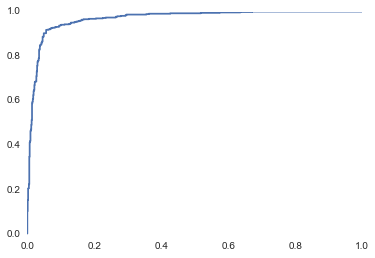

In [178]:
false_positive_rate, true_positive_rate, _ = metrics.roc_curve(y_test, probs['p(y=1)'])

plt.plot(false_positive_rate, true_positive_rate)

# from sklearn.cross_validation

print metrics.roc_auc_score(y_test, y_pred)

In [179]:
metrics.f1_score(probs['y_pred'], probs['y_test'])

0.90978886756237998

Produce a plot which shows classification accuracy as a function of number of features (k)

In [61]:
# your code here

### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [62]:
# your code here




### Exercise 8: Demonstrate how the accuracy of your predictions changes when you set your CV threshold to 50%

In [63]:
# your code here

###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

In [64]:
# your discussion here

*Explore and use your own reasoning to improve upon your results*

#### What is the highest score you achieve on the training data, as measured by the area under your AUC curve?

###Bonus: 

Work through the example in the `SupportVectorMachines` folder and repeat the above steps using support vector machines. You'll also find the documentation on the SVC classifier in SkLearn: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html to be useful.

For computational efficiency, keep the threshold at 50% and use the top K features calculated in Exercise 6.

In [65]:
# your code here

Plot the decision boundary with the two features that best predict whether an email is spam or not spam

In [66]:
# your visualization here

## On your own: 

Answer the following questions:
    
1. Explain which techniques did well and which techniques did not and your reasoning behind why they did/did not perform well.
2. Between Logistic Regression and KNN, which classifier performed better? Why do you think this is?
3. How might you improve this model?
4. How does the number of features you used influence the performance and overfitting?

**Submit your answers the above and to the exercises to the class repository, individually**
